# Imports

In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import model_selection, linear_model
import matplotlib.pyplot as plt

# Functions

In [57]:
def normalize(a):
    return (a - np.min(a)) / (np.max(a) - np.min(a))

def linear_regression(x, y, iters, alpha):
    m = len(x)
    cost = np.empty(iters)
    rmse = np.empty(iters)
    theta = np.zeros(x.shape[1])
    pred = predict(x, theta)
    for i in range(iters):
        cost[i] = (1 / 2 * m) * np.sum((pred - y) ** 2)
        for j in range(x.shape[1]):
            theta[j] = theta[j] - (alpha / m) * np.sum((pred - y) * x[:, j])
        pred = predict(x, theta)
        rmse[i] = calc_rmse(y, pred)
    return theta, cost, rmse

def linear_regression_with_L1(x, y, iters, alpha, lambda_):
    m = len(x)
    cost = np.empty(iters)
    rmse = np.empty(iters)
    theta = np.zeros(x.shape[1])
    pred = predict(x, theta)
    for i in range(iters):
        cost[i] = (1 / 2 * m) * (np.sum((pred - y) ** 2) + lambda_ * np.sum(np.abs(theta[1:])))
        theta[0] = theta[0] - (alpha / m) * np.sum((pred - y) * x[:, 0])
        for j in range(1, x.shape[1]):
            theta[j] = theta[j] - (alpha / m) * np.sum((pred - y) * x[:, j]) - (alpha * lambda_ / (2 * m)) * np.sign(theta[j])
        pred = predict(x, theta)
        rmse[i] = calc_rmse(y, pred)
    return theta, cost, rmse

def linear_regression_with_L2(x, y, iters, alpha, lambda_):
    m = len(x)
    cost = np.empty(iters)
    rmse = np.empty(iters)
    theta = np.zeros(x.shape[1])
    pred = predict(x, theta)
    for i in range(iters):
        cost[i] = (1 / 2 * m) * (np.sum((pred - y) ** 2) + lambda_ * np.sum(theta[1:] ** 2))
        theta[0] = theta[0] - (alpha / m) * np.sum((pred - y) * x[:, 0])
        for j in range(1, x.shape[1]):
            theta[j] = theta[j] - (alpha / m) * np.sum((pred - y) * x[:, j]) - (alpha * lambda_ / m) * theta[j]
        pred = predict(x, theta)
        rmse[i] = calc_rmse(y, pred)
    return theta, cost, rmse

def calc_rmse(y, y_pred):
    rss = sum((y - y_pred) ** 2)
    rmse = np.sqrt(rss / len(y))
    return rmse

def predict(x, theta):
    return x @ theta

def preprocess(x):
    m = len(x)
    x_std = np.apply_along_axis(normalize, 0, x)
    x_std = np.c_[np.ones(m), x_std]
    return x_std

def find_best_lambdas(x, y):
    lasso = linear_model.Lasso(random_state=0, max_iter=10000)
    ridge = linear_model.Ridge(random_state=0, max_iter=10000)
    lambdas = np.logspace(-1, 1, 30)

    tuned_parameters = [{'alpha': lambdas}]
    n_folds = 5
    clf_l1 = model_selection.GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
    clf_l1.fit(x, y)
    clf_l2 = model_selection.GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False)
    clf_l2.fit(x, y)
    return clf_l1.best_params_['alpha'], clf_l2.best_params_['alpha']

def plot_rmse(iters, rmse):
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    plt.title('RMSE vs. Iterations Curve')
    plt.plot(np.arange(iters), rmse)
    plt.show()
    
def plot_head_brain(x, y, y_pred):
    plt.scatter(x, y, color='red')
    plt.plot(x, y_pred, color='black')
    plt.xlabel('Head Size(cm^3)(Normalized)')
    plt.ylabel('Brain Weight(grams)')
    plt.legend(['Best Fit Line', 'Datapoints'])
    plt.show()

# Loading Abalone Dataset and Preprocessing

In [58]:
abalone = pd.read_csv('Datasets/abalone.data', header=None)

x, y = abalone[abalone.columns[:-1]], abalone[abalone.columns[-1]].values
x = pd.get_dummies(x).values
x = preprocess(x)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=1)
iters = 10000
alpha = 0.1

# Linear regression on Abalone dataset without regularization

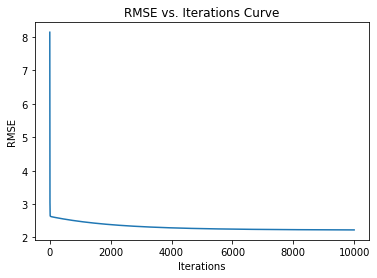

Final RMSE for training set:  2.2263490841842946
RMSE for testing set:  2.225623070894104


In [59]:
theta, cost, rmse_train = linear_regression(x_train, y_train, iters, alpha)

y_train_pred = predict(x_train, theta)
y_test_pred = predict(x_test, theta)

rmse_test = calc_rmse(y_test, y_test_pred)

plot_rmse(iters, rmse_train)

print("Final RMSE for training set: ", rmse_train[-1])
print("RMSE for testing set: ", rmse_test)

# Closed Form Implementation of Linear Regression

In [60]:
theta = np.linalg.pinv(x_train.T @ x_train) @ x_train.T @ y_train
y_train_pred = predict(x_train, theta)
y_test_pred = predict(x_test, theta)

# RMSE for Training and Testing set for Closed Form Implementation

In [61]:
rmse_train = calc_rmse(y_train, y_train_pred)
rmse_test = calc_rmse(y_test, y_test_pred)

print("RMSE for training set: ", rmse_train)
print("RMSE for testing set: ", rmse_test)

RMSE for training set:  2.1941215591356347
RMSE for testing set:  2.183479244868071


> **_Closed Form_ implementation gives better RMSE for both training and testing set.  
However, performance of _gradient descent_ can be improved by choosing optimal alpha and number of iterations.**  


# Getting optimal regularization parameters for L1 and L2

In [62]:
lambda_l1, lambda_l2 = find_best_lambdas(x_train, y_train)
print("Optimal regularization parameter for L1: ", lambda_l1)
print("Optimal regularization parameter for L2: ", lambda_l2)

Optimal regularization parameter for L1:  0.1
Optimal regularization parameter for L2:  0.30391953823131973


# Gradient Descent with L1 regularization on Abalone Dataset

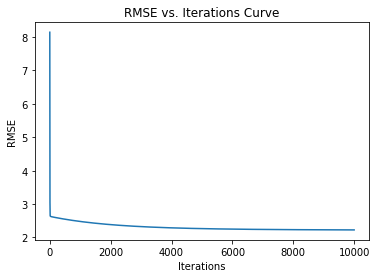

Final RMSE for training set:  2.226404216005131
RMSE for testing set:  2.2256838020459475


In [63]:
theta, cost, rmse_train = linear_regression_with_L1(x_train, y_train, iters, alpha, lambda_l1)

y_train_pred = predict(x_train, theta)
y_test_pred = predict(x_test, theta)

rmse_test = calc_rmse(y_test, y_test_pred)

plot_rmse(iters, rmse_train)

print("Final RMSE for training set: ", rmse_train[-1])
print("RMSE for testing set: ", rmse_test)

# Gradient Descent with L2 regularization on Abalone Dataset

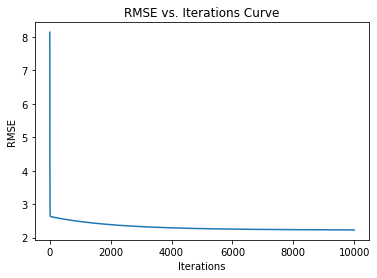

Final RMSE for training set:  2.2289876849319
RMSE for testing set:  2.2272490643963416


In [64]:
theta, cost, rmse_train = linear_regression_with_L2(x_train, y_train, iters, alpha, lambda_l2)

y_train_pred = predict(x_train, theta)
y_test_pred = predict(x_test, theta)

rmse_test = calc_rmse(y_test, y_test_pred)

plot_rmse(iters, rmse_train)

print("Final RMSE for training set: ", rmse_train[-1])
print("RMSE for testing set: ", rmse_test)

# Loading head_brain dataset and Preprocessing

In [65]:
head_brain = pd.read_csv('Datasets/headbrain.csv')
x = head_brain['Head Size(cm^3)'].values
y = head_brain['Brain Weight(grams)'].values
x = preprocess(x)
iters = 10000
alpha = 0.1

# Linear regression on head_brain dataset without regularization

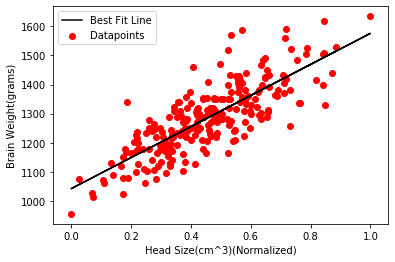

RMSE : 72.12062137837088


In [66]:
theta, cost, rmse_train = linear_regression(x, y, iters, alpha)
y_pred = predict(x, theta)

plot_head_brain(x[:, 1], y, y_pred)
print("RMSE :", rmse_train[-1])

# Getting optimal regularization parameters for L1 and L2

In [67]:
lambda_l1, lambda_l2 = find_best_lambdas(x, y)
print("Optimal regularization parameter for L1: ", lambda_l1)
print("Optimal regularization parameter for L2: ", lambda_l2)

Optimal regularization parameter for L1:  0.1
Optimal regularization parameter for L2:  0.1


# Linear Regression on head_brain dataset with L1 Regularization

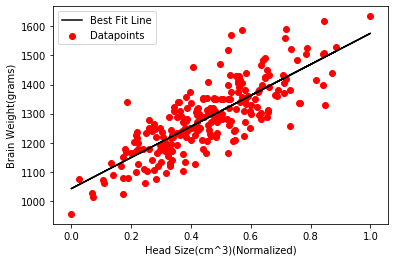

RMSE : 72.12062138791399


In [68]:
theta, cost, rmse_train = linear_regression_with_L1(x, y, iters, alpha, lambda_l1)
y_pred_L1 = predict(x, theta)

plot_head_brain(x[:, 1], y, y_pred_L1)
print("RMSE :", rmse_train[-1])

# Linear Regression on head_brain dataset with L2 Regularization

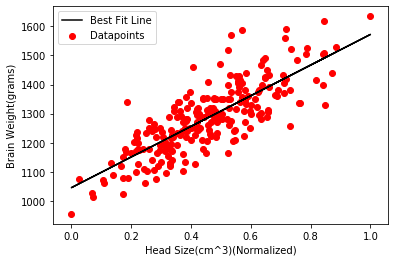

RMSE : 72.13122594090213


In [69]:
theta, cost, rmse_train = linear_regression_with_L2(x, y, iters, alpha, lambda_l2)
y_pred_L2 = predict(x, theta)

plot_head_brain(x[:, 1], y, y_pred_L2)
print("RMSE :", rmse_train[-1])

# Comparison of Best Fit Lines

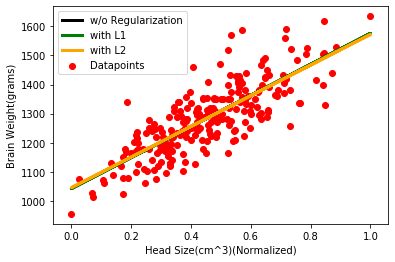

In [70]:
plt.scatter(x[:, 1], y, label='Datapoints', color='red')
plt.plot(x[:, 1], y_pred, label='w/o Regularization', color='black', linewidth=3)
plt.plot(x[:, 1], y_pred_L1, label='with L1', color='green', linewidth=3)
plt.plot(x[:, 1], y_pred_L2, label='with L2', color='orange', linewidth=3)
plt.xlabel('Head Size(cm^3)(Normalized)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

> **There is not much difference visually but since _RMSE for linear regression without regularization_ < _RMSE for linear regression with L1 regularization_ < _RMSE for linear regression with L2 regularization_, 
_linear regression without regularization_ gives the best _best fit line_ whereas _linear regression with L2 regularization_ gives the worst _best fit line_.**  
